In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

project_dir = str(os.path.dirname((os.path.abspath(''))))
sys.path.append(project_dir)
print(project_dir)



from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


import statsmodels.api as sm

import  datetime

import math

import seaborn as sns

import statsmodels.api as sms

/Users/erik/metis/spotipy_hits


# Load data

## Load dataframe from csv: merged spotify and rolling stone data

In [2]:
base_path = project_dir + '/data/processed/'
file_name = 'df_spot_rs_merge_basic.csv'
print(base_path + file_name)
df_spot_rs_merge = pd.read_csv(base_path + file_name)
df_spot_rs_merge = df_spot_rs_merge.drop(['Unnamed: 0'], axis=1)

/Users/erik/metis/spotipy_hits/data/processed/df_spot_rs_merge_basic.csv


# Prepare data

## Add log score to dataframe

In [3]:
df_spot_rs_merge['log_score'] = np.log10(df_spot_rs_merge['year_rank_score'])

And rearrange columns

In [4]:
df_spot_rs_merge = df_spot_rs_merge[['year_rank_score', 'log_score', 'year_album_units', 'avg_vol', 'total_tracks',
       'duration', 'release_date', 'record_label', 'title_cleaned',
       'caption_artist', 'album_id']]

## Add dummy variables for record_label to dataframe

In [5]:
df_spot_rs_merge = pd.get_dummies(df_spot_rs_merge, columns=['record_label'])

In [7]:
# df

# Run Basic Linear Regression Model

## First, without record label columns
### in statsmodels

In [8]:
df = df_spot_rs_merge
X = df[['avg_vol', 'total_tracks', 'duration', 'release_date']]
y = np.log10(df.year_rank_score)


X = sm.add_constant(X)
model = sm.OLS(y,X)

results = model.fit()
results.summary()

/Users/erik/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        year_rank_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.802
Date:                Thu, 23 Jan 2020   Prob (F-statistic):              0.127
Time:                        17:53:22   Log-Likelihood:                -736.12
No. Observations:                 600   AIC:                             1482.
Df Residuals:                     595   BIC:                             1504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5688      0.212     12.120      0.000       2.153       2.985
avg_vol          0.0154      0.013      1.216      0.224      -0.009       0.040
total_tracks     0.0125      0.008      1.576      0.116      -0.003       0.028
duration     -1.765e-08   4.39e-08     -0.402      0.688   -1.04e-07    6.86e-08
release_date  4.224e-11   9.52e-11      0.444      0.657   -1.45e-10    2.29e-10
==============================================================================
Omnibus:                       19.909   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.485
Skew:                          -0.115   Prob(JB):                      0.00529
Kurtosis:                       2.395   Cond. No.                     9.11e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### in sklearn

1
coefficients [0.015413419648790947, 0.012520858438414212, -1.7649454413719135e-08, 4.2241467660926235e-11]
['avg_vol', 'total_tracks', 'duration', 'release_date']
intercetpt 2.5688
R^2 0.01197
RSE 0.8252513316887136
MAE 0.6992182277058957


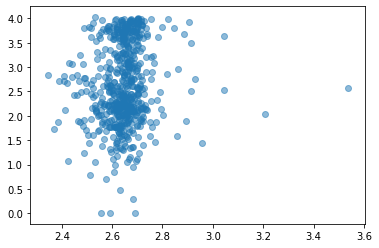

In [19]:
df = df_spot_rs_merge

X = df[['avg_vol', 'total_tracks', 'duration', 'release_date']]
y = df.log_score

reg = LinearRegression().fit(X, y)
reg.score(X, y)

print('1')
print('coefficients', [coef for coef in reg.coef_])
print(['avg_vol', 'total_tracks', 'duration', 'release_date'])
print('intercetpt',  round(reg.intercept_, 4))

print('R^2', round(reg.score(X, y), 5))
print("RSE", math.sqrt(mean_squared_error(y, reg.predict(X))))
print("MAE", mean_absolute_error(y, reg.predict(X)))
plt.scatter(reg.predict(X), y, alpha=0.5)

## Second, with record_label dummy variables

### In Statsmodels

In [10]:
df = df_spot_rs_merge
X = df[['avg_vol', 'total_tracks', 'duration', 'release_date', 'record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other']]
y = np.log10(df.year_rank_score)


X = sm.add_constant(X)
model = sm.OLS(y,X)

results = model.fit()
results.summary()


/Users/erik/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        year_rank_score   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.352
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.37e-07
Time:                        17:53:23   Log-Likelihood:                -713.64
No. Observations:                 600   AIC:                             1449.
Df Residuals:                     589   BIC:                             1498.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.3818      0.183     13.008      0.000       2.022       2.741
avg_vol                           0.0142      0.012      1.138      0.255      -0.010       0.039
total_tracks                      0.0119      0.008      1.544      0.123      -0.003       0.027
duration                      -1.728e-08   4.28e-08     -0.404      0.686   -1.01e-07    6.68e-08
release_date                   7.891e-11   9.39e-11      0.841      0.401   -1.05e-10    2.63e-10
record_label_Atlantic Records     0.5008      0.133      3.777      0.000       0.240       0.761
record_label_Capitol              0.3065      0.147      2.086      0.037       0.018       0.595
record_label_Columbia Records     0.2429      0.138      1.763      0.078      -0.028       0.513
record_label_Interscope           0.5975      0.106      5.662      0.000       0.390       0.805
record_label_RCA Records          0.2997      0.148      2.028      0.043       0.009       0.590
record_label_Republic             0.4465      0.144      3.093      0.002       0.163       0.730
record_label_other               -0.0123      0.063     -0.194      0.846      -0.136       0.112
==============================================================================
Omnibus:                        6.673   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.327
Skew:                          -0.208   Prob(JB):                       0.0423
Kurtosis:                       2.716   Cond. No.                     3.60e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### in sklearn

2
coefficients [0.014191424220786626, 0.011935901100030726, -1.728055487991033e-08, 7.890566103939099e-11, 0.16058752486875225, -0.03372824200011165, -0.09737612162115585, 0.25729618687912215, -0.04053551562870594, 0.10627320054883099, -0.35251703304673204]
['avg_vol', 'total_tracks', 'duration', 'release_date', 'record_label_Atlantic Records', 'record_label_Capitol', 'record_label_Columbia Records', 'record_label_Interscope', 'record_label_RCA Records', 'record_label_Republic', 'record_label_other']
intercetpt 2.722
R^2 0.08329
RSE 0.7949062333178634
MAE 0.6642512843788034


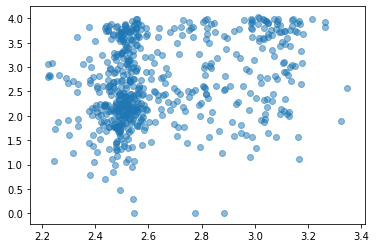

In [18]:
df = df_spot_rs_merge

X = df[['avg_vol', 'total_tracks', 'duration', 'release_date', 'record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other']]
y = df.log_score

reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(2)
print('coefficients', [coef for coef in reg.coef_])
print(['avg_vol', 'total_tracks', 'duration', 'release_date', 'record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other'])
print('intercetpt',  round(reg.intercept_, 4))

print('R^2', round(reg.score(X, y), 5))
print("RSE", math.sqrt(mean_squared_error(y, reg.predict(X))))
print("MAE", mean_absolute_error(y, reg.predict(X)))
plt.scatter(reg.predict(X), y, alpha=0.5)

## Try with only dummy variables
Is that even meaningful?

### In statsmodels

In [12]:
df = df_spot_rs_merge
X = df[['record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other']]
y = np.log10(df.year_rank_score)


X = sm.add_constant(X)
model = sm.OLS(y,X)

results = model.fit()
results.summary()

/Users/erik/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        year_rank_score   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           7.13e-08
Time:                        17:53:23   Log-Likelihood:                -717.51
No. Observations:                 600   AIC:                             1449.
Df Residuals:                     593   BIC:                             1480.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.4875      0.045     55.642      0.000       2.400       2.575
record_label_Atlantic Records     0.5346      0.131      4.079      0.000       0.277       0.792
record_label_Capitol              0.2867      0.144      1.994      0.047       0.004       0.569
record_label_Columbia Records     0.2250      0.133      1.692      0.091      -0.036       0.486
record_label_Interscope           0.6282      0.103      6.125      0.000       0.427       0.830
record_label_RCA Records          0.3144      0.144      2.186      0.029       0.032       0.597
record_label_Republic             0.4845      0.141      3.427      0.001       0.207       0.762
record_label_other                0.0141      0.057      0.248      0.804      -0.097       0.125
==============================================================================
Omnibus:                        5.759   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.577
Skew:                          -0.199   Prob(JB):                       0.0615
Kurtosis:                       2.745   Cond. No.                     2.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### In sklearn

3
coefficients [0.1792125449389923, -0.06860631167257054, -0.13039988807148126, 0.2728689853438593, -0.04095964708754431, 0.12917405545307736, -0.34128973890433295]
['record_label_Atlantic Records', 'record_label_Capitol', 'record_label_Columbia Records', 'record_label_Interscope', 'record_label_RCA Records', 'record_label_Republic', 'record_label_other']
intercetpt 2.8428
R^2 0.07141
RSE 0.8000424091554693
MAE 0.6637163645288884


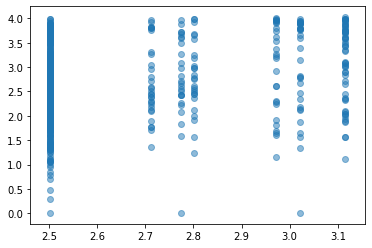

In [20]:
df = df_spot_rs_merge

X = df[['record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other']]
y = df.log_score

reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(3)
print('coefficients', [coef for coef in reg.coef_])
print(['record_label_Atlantic Records',
       'record_label_Capitol', 'record_label_Columbia Records',
       'record_label_Interscope', 'record_label_RCA Records',
       'record_label_Republic', 'record_label_other'])
print('intercetpt',  round(reg.intercept_, 4))

print('R^2', round(reg.score(X, y), 5))
print("RSE", math.sqrt(mean_squared_error(y, reg.predict(X))))
print("MAE", mean_absolute_error(y, reg.predict(X)))
plt.scatter(reg.predict(X), y, alpha = .5)

## Summarize results from sklearn

```
1
coefficients [0.015413419648790947, 0.012520858438414212, -1.7649454413719135e-08, 4.2241467660926235e-11]
['avg_vol', 'total_tracks', 'duration', 'release_date']
intercetpt 2.5688
R^2 0.01197
RSE 0.8252513316887136
MAE 0.6992182277058957

2
coefficients [0.014191424220786626, 0.011935901100030726, -1.728055487991033e-08, 7.890566103939099e-11, 0.16058752486875225, -0.03372824200011165, -0.09737612162115585, 0.25729618687912215, -0.04053551562870594, 0.10627320054883099, -0.35251703304673204]
['avg_vol', 'total_tracks', 'duration', 'release_date', 'record_label_Atlantic Records', 'record_label_Capitol', 'record_label_Columbia Records', 'record_label_Interscope', 'record_label_RCA Records', 'record_label_Republic', 'record_label_other']
intercetpt 2.722
R^2 0.08329
RSE 0.7949062333178634
MAE 0.6642512843788034

3
coefficients [0.1792125449389923, -0.06860631167257054, -0.13039988807148126, 0.2728689853438593, -0.04095964708754431, 0.12917405545307736, -0.34128973890433295]
['record_label_Atlantic Records', 'record_label_Capitol', 'record_label_Columbia Records', 'record_label_Interscope', 'record_label_RCA Records', 'record_label_Republic', 'record_label_other']
intercetpt 2.8428
R^2 0.07141
RSE 0.8000424091554693
MAE 0.6637163645288884
```

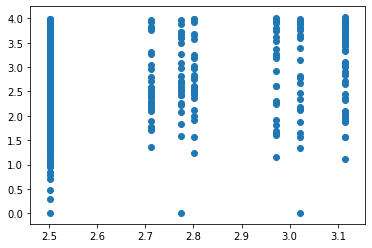

In [14]:
plt.scatter(reg.predict(X), y)